In [3]:
day = 12
import os
if os.path.exists(f"day_{day}_test.txt"):
    test = [x.strip() for x in open(f'day_{day}_test.txt', 'r')]
lines = [x.strip() for x in open(f'day_{day}_input.txt', 'r')]

    
#CHECKPOINT
import numpy as np
import math

case = test

map_ = np.zeros(dtype='str',shape=(len(case),len(case[0])))
for i, row in enumerate(case):
    for j, col in enumerate(row):
        map_[i][j] = col
        
print(map_)
itemindex = np.where(map_ == 'S')
col_S = itemindex[0][0]
row_S = itemindex[1][0]

itemindex = np.where(map_ == 'E')
col_E = itemindex[0][0]
row_E = itemindex[1][0]


def within_one(row,col,this):
    res = ord(map_[col][row]) == ord(this) or ord(map_[col][row]) == ord(this) + 1 or this == 'S' or this =='z' and map_[col][row] == 'E'
    return res

best_to_here = np.zeros(shape=map_.shape) + map_.shape[0]*map_.shape[1]
paths = []

def closest(row,col,next_):
    #print(next_)
    min_dist = map_.shape[0]+map_.shape[1]
    indices = zip(* np.where(map_ == next_))
    row_min = -1
    col_min = -1
    for i, j,in indices:
        #print(i,j)
        dist = math.hypot(row - i, col - j)
        #print(dist)
        if dist < min_dist:
            min_dist = dist
            row_min = i
            col_min = j
    #print(row_min, col_min)
    return min_dist#row_min, col_min

def take_step(path_so_far,row,col):
    this = map_[col][row]
    if (row,col,this) in path_so_far:
        return False
    if len(path_so_far) + 1 < best_to_here[col][row]:
        best_to_here[col][row] = len(path_so_far) + 1
    else:
        return False
    next_step = path_so_far.copy()
    next_step.append((row,col,this))

    if map_[col][row] == 'E':
        paths.append(next_step)
        print(len(next_step),next_step)
        return True
    
    next_elevation = 'a' if this == 'S' else 'E' if this == 'z' else chr(ord(this) + 1)
    
    search_order = list()
    
    if row < map_.shape[1] - 1 :
        if within_one(row+1,col,this):
            dist = closest(row+1,col,next_elevation)
            search_order.append((next_step, row+1,col,dist))
    if row - 1 >= 0:
        if within_one(row-1,col,this):
            dist = closest(row-1,col,next_elevation)
            search_order.append((next_step, row-1,col,dist))
    if col < map_.shape[0] - 1: 
        if within_one(row,col+1,this):
            dist = closest(row,col+1,next_elevation)
            search_order.append((next_step, row,col+1,dist))
    if col-1 >= 0:
        if within_one(row,col-1,this):
            dist = closest(row,col-1,next_elevation)
            search_order.append((next_step, row,col-1,dist))
    
    #print(sorted(search_order,key=lambda x: x[3]))
    for search in sorted(search_order,key=lambda x: x[3]):
        #print(search)
        take_step(search[0],search[1],search[2])
        

take_step([],row_S,col_S)

print([len(path) for path in paths])

[['S' 'a' 'b' 'q' 'p' 'o' 'n' 'm']
 ['a' 'b' 'c' 'r' 'y' 'x' 'x' 'l']
 ['a' 'c' 'c' 's' 'z' 'E' 'x' 'k']
 ['a' 'c' 'c' 't' 'u' 'v' 'w' 'j']
 ['a' 'b' 'd' 'e' 'f' 'g' 'h' 'i']]
32 [(0, 0, 'S'), (1, 0, 'a'), (1, 1, 'b'), (2, 1, 'c'), (2, 2, 'c'), (2, 3, 'c'), (2, 4, 'd'), (3, 4, 'e'), (4, 4, 'f'), (5, 4, 'g'), (6, 4, 'h'), (7, 4, 'i'), (7, 3, 'j'), (7, 2, 'k'), (7, 1, 'l'), (7, 0, 'm'), (6, 0, 'n'), (5, 0, 'o'), (4, 0, 'p'), (3, 0, 'q'), (3, 1, 'r'), (3, 2, 's'), (3, 3, 't'), (4, 3, 'u'), (5, 3, 'v'), (6, 3, 'w'), (6, 2, 'x'), (6, 1, 'x'), (5, 1, 'x'), (4, 1, 'y'), (4, 2, 'z'), (5, 2, 'E')]
[32]


E
S
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
190592
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
(array([ 0,  0,  0, ..., 40, 40, 40], dtype=int64), array([  8,   9,  10, ..., 158, 159, 160], dtype=int64))


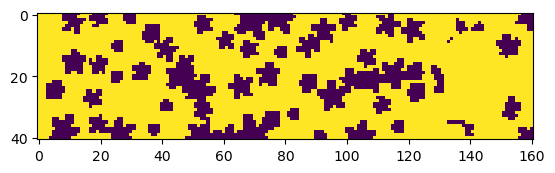

S


In [126]:
case = lines

map_ = np.zeros(dtype='str',shape=(len(case),len(case[0])))
for i, row in enumerate(case):
    for j, col in enumerate(row):
        map_[i][j] = col
        


def is_island(i,j,this,visited):
    next_elevation = 'a' if this == 'S' else 'E' if this == 'z' else chr(ord(this) + 1)
    #v_copy = visited.copy()
    if map_[i][j] == next_elevation or this == 'E':
        return False, visited
    elif map_[i][j] == this:
        # island if no possible way to next.
        # all options must be this or next.
        #print(i,j,this, map_[i][j])
        visited.add((i,j))
        if (i+1,j) not in visited and i < map_.shape[0] - 1:
            right, visited = is_island(i+1,j,this,visited)
        else:
            right = True
        if (i-1,j) not in visited and i - 1 >= 0:
            left, visited = is_island(i-1,j,this,visited)
        else:
            left = True
        if (i,j+1) not in visited and j < map_.shape[1] - 1:
            down, visited = is_island(i,j+1,this,visited)
        else:
            down = True
        if (i,j-1) not in visited and j -1 >= 0: 
            #print('up')
            up, visited = is_island(i,j-1,this,visited)
        else:
            up = True
        return up and down and left and right, visited
    return True, visited


islands = []
islands_map = np.ones(shape=map_.shape)

for search_test in np.unique(map_):

    print(search_test)
    indices = zip(* np.where(map_ == search_test))
    row_min = -1
    col_min = -1
    for i, j,in indices:
        #print(i,j,best_to_here[i][j])
        if (i,j) not in islands:
            res = is_island(i,j,search_test,set())
            if res[0] == True:
                for a in res[1]:
                    islands.append((a[1],a[0]))
                    islands_map[a[0]][a[1]] = 0

print(len(islands))
print(islands_map)
import matplotlib.pyplot as plt
print(np.where(islands_map == 0))
plt.imshow(islands_map)
plt.show()
print(map_[20][0])

In [ ]:
#CHECKPOINT
import numpy as np
import math

case = lines

map_ = np.zeros(dtype='str',shape=(len(case),len(case[0])))
for i, row in enumerate(case):
    for j, col in enumerate(row):
        map_[i][j] = col
        
print(map_)
itemindex = np.where(map_ == 'S')
col_S = itemindex[0][0]
row_S = itemindex[1][0]

itemindex = np.where(map_ == 'E')
col_E = itemindex[1][0]
row_E = itemindex[0][0]


def within_one(row,col,this):
    res = ord(map_[col][row]) == ord(this) or ord(map_[col][row]) == ord(this) + 1 or this == 'S' or this =='z' and map_[col][row] == 'E'
    return res

best_to_here = np.zeros(shape=map_.shape) + map_.shape[0]*map_.shape[1]
max_found = 'a'
paths = []

#print(set(islands))

def closest(row,col,next_):
    #print(next_)
    min_dist = map_.shape[0]+map_.shape[1]
    indices = zip(* np.where(map_ == next_))
    row_min = -1
    col_min = -1
    for i, j,in indices:
        #print(i,j)
        dist = math.hypot(row - i, col - j)
        #print(dist)
        if dist < min_dist:
            min_dist = dist
            row_min = i
            col_min = j
    #print(row_min, col_min)
    return min_dist#row_min, col_min
    

def take_step(path_so_far,row,col):
    global max_found
    this = map_[col][row]
    if ord(this) > ord(max_found):
        max_found = this
    if (row,col,this) in path_so_far:
        #print("visited")
        return False
    if (row,col) in islands:
        print("island", row,col)
        return False
    if len(path_so_far) + 1 < best_to_here[col][row]:
        best_to_here[col][row] = len(path_so_far) + 1
    else:
        #print("better")
        return False
    
    next_step = path_so_far.copy()
    next_step.append((row,col,this))

    if map_[col][row] == 'E':
        paths.append(next_step)
        print(len(next_step),next_step)
        return True
    
    next_elevation = 'a' if this == 'S' else 'E' if this == 'z' else chr(ord(this) + 1)
    search_order = list()
    
    if row < map_.shape[1] - 1:
        if within_one(row+1,col,this):
            dist = closest(row+1,col,next_elevation)
            search_order.append((next_step, row+1,col,dist))
    if row - 1 >= 0:
        if within_one(row-1,col,this):
            dist = closest(row-1,col,next_elevation)
            search_order.append((next_step, row-1,col,dist))
    if col < map_.shape[0] - 1: 
        if within_one(row,col+1,this):
            dist = closest(row,col+1,next_elevation)
            search_order.append((next_step, row,col+1,dist))
    if col-1 >= 0:
        if within_one(row,col-1,this):
            dist = closest(row,col-1,next_elevation)
            search_order.append((next_step, row,col-1,dist))
    
    #print(sorted(search_order,key=lambda x: x[3]))
    for search in sorted(search_order,key=lambda x: x[3]):
        #print(search)
        take_step(search[0],search[1],search[2])
        
#print(row_S,col_S)
take_step([],row_S,col_S)
print([len(path) for path in paths])

print(max_found)

[['a' 'b' 'c' ... 'a' 'a' 'a']
 ['a' 'b' 'a' ... 'a' 'a' 'a']
 ['a' 'b' 'a' ... 'a' 'a' 'a']
 ...
 ['a' 'b' 'c' ... 'a' 'a' 'a']
 ['a' 'b' 'c' ... 'a' 'a' 'a']
 ['a' 'b' 'c' ... 'a' 'a' 'a']]
island 129 25
island 130 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129 25
island 130 25
island 129

[[6601. 6601. 6601. ... 6601. 6601. 6601.]
 [6601. 6601. 6601. ... 6601. 6601. 6601.]
 [6601. 6601. 6601. ... 6601. 6601. 6601.]
 ...
 [6601. 6601. 6601. ... 6601. 6601. 6601.]
 [6601. 6601. 6601. ... 6601. 6601. 6601.]
 [6601. 6601. 6601. ... 6601. 6601. 6601.]]
a


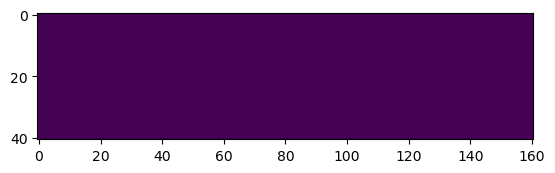

In [121]:
print(best_to_here)
print(max_found)
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(best_to_here)
plt.show()